In [9]:
###<进阶> 3.4.1 验证曲线
#为了验证模型，我们需要一个评分函数，例如分类器的准确性。
#有时绘制单个超参数对训练分数和验证分数的影响是有帮助的，以找出估计器对某些超参数值是过拟合还是拟合不足。
import numpy as np
from sklearn.model_selection import validation_curve
from sklearn.datasets import load_iris
from sklearn.svm import SVC

np.random.seed(0)
X, y = load_iris(return_X_y=True)
indices = np.arange(y.shape[0])
np.random.shuffle(indices)
X, y = X[indices], y[indices]
train_scores, valid_scores = validation_curve(  #validation_curve函数返回指定参数范围内模型性能的训练得分和验证得分，可以用于选择最佳的超参数取值。
    SVC(kernel="linear"), X, y, param_name="C", param_range=np.logspace(-7, 3, 3),  #param_name，参数的名字
                                                                                    #param_range, 参数的取值范围;
)
train_scores  #训练集上评分。param_range有3个元素，所以train_scores和valid_scores都将有3个得分序列


array([[0.90833333, 0.94166667, 0.91666667, 0.89166667, 0.925     ],
       [0.9       , 0.925     , 0.93333333, 0.925     , 0.93333333],
       [0.975     , 1.        , 0.98333333, 0.975     , 0.99166667]])

In [3]:
valid_scores  #验证集集上评分

array([[0.9       , 0.9       , 0.9       , 0.96666667, 0.9       ],
       [0.9       , 0.83333333, 0.96666667, 0.96666667, 0.93333333],
       [1.        , 0.93333333, 1.        , 1.        , 0.9       ]])

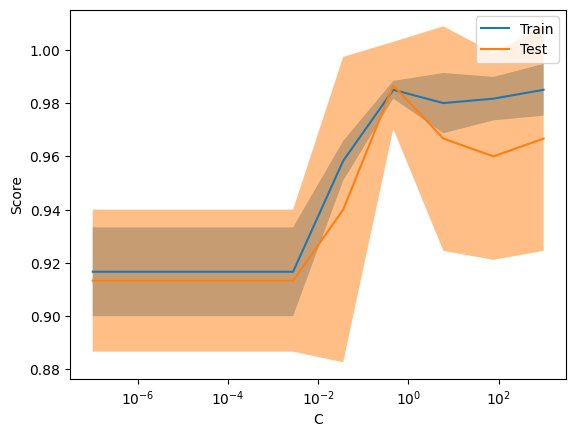

In [10]:
## 绘制曲线
#如果训练分数和验证分数都较低，则估计器欠拟合。如果训练分数高而验证分数低， 估计器过拟合，否则它运行良好。低训练分数和高验证分数通常是不可能的。
from sklearn.datasets import load_iris
from sklearn.model_selection import ValidationCurveDisplay
from sklearn.svm import SVC
from sklearn.utils import shuffle
X, y = load_iris(return_X_y=True)
X, y = shuffle(X, y, random_state=0)
ValidationCurveDisplay.from_estimator(
   SVC(kernel="linear"), X, y, param_name="C", param_range=np.logspace(-7, 3, 10) #下图可知最佳C参数约在接近10^0附近，模型得分最好且不欠拟合。
)

In [11]:
###<进阶> 3.4.2 学习曲线
#学习曲线显示了针对不同数量的训练样本的估计器的验证和训练得分。
#可以了解我们从添加更多的训练数据中受益多少，以及估计器是否更容易受到方差误差或偏差误差的影响。
from sklearn.model_selection import learning_curve
from sklearn.svm import SVC

train_sizes, train_scores, valid_scores = learning_curve(
    SVC(kernel='linear'), X, y, train_sizes=[50, 80, 110], cv=5)
train_sizes   #训练集大小


array([ 50,  80, 110])

In [12]:
train_scores #模型训练集评分

array([[0.98      , 0.98      , 0.98      , 0.98      , 0.98      ],
       [0.9875    , 1.        , 0.9875    , 0.9875    , 0.9875    ],
       [0.98181818, 1.        , 0.98181818, 0.98181818, 0.99090909]])

In [13]:
valid_scores #模型验证集评分

array([[1.        , 0.93333333, 1.        , 1.        , 0.96666667],
       [1.        , 0.96666667, 1.        , 1.        , 0.96666667],
       [1.        , 0.96666667, 1.        , 1.        , 0.96666667]])

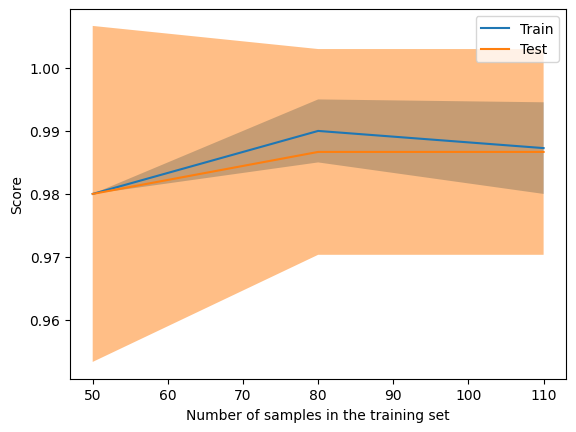

In [14]:
## 绘制学习曲线
from sklearn.datasets import load_iris
from sklearn.model_selection import LearningCurveDisplay
from sklearn.svm import SVC
from sklearn.utils import shuffle
X, y = load_iris(return_X_y=True)
X, y = shuffle(X, y, random_state=0)
LearningCurveDisplay.from_estimator(
   SVC(kernel="linear"), X, y, train_sizes=[50, 80, 110], cv=5)  #下图可知，训练样本在80左右，效果最佳-评分高且不过拟合。

In [ ]:
### 总结
#一些简单或者更加灵活的绘图需求，可用matplotlib等绘制。